In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [4]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


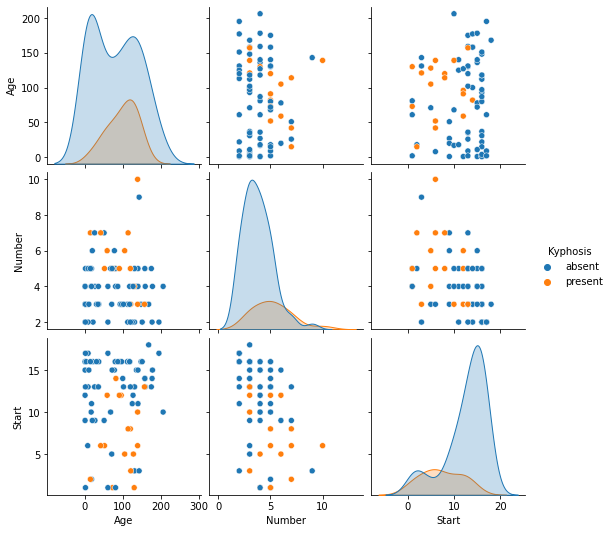

In [5]:
sns.pairplot(data=df,hue='Kyphosis')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X=df.drop('Kyphosis', axis=1)
y=df['Kyphosis']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree=DecisionTreeClassifier()

In [11]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
predictions=dtree.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[13  4]
 [ 6  2]]


              precision    recall  f1-score   support

      absent       0.68      0.76      0.72        17
     present       0.33      0.25      0.29         8

    accuracy                           0.60        25
   macro avg       0.51      0.51      0.50        25
weighted avg       0.57      0.60      0.58        25



In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rfc = RandomForestClassifier(n_estimators=200)

In [17]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [18]:
rfc_pred=rfc.predict(X_test)

In [19]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[17  0]
 [ 6  2]]


              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



[Text(1268.181818181818, 2038.5, 'X[1] <= 4.5\ngini = 0.27\nsamples = 56\nvalue = [47, 9]'),
 Text(507.27272727272725, 1766.7, 'X[0] <= 128.5\ngini = 0.142\nsamples = 39\nvalue = [36, 3]'),
 Text(253.63636363636363, 1494.9, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(760.9090909090909, 1494.9, 'X[2] <= 13.5\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(507.27272727272725, 1223.1, 'X[1] <= 2.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(253.63636363636363, 951.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(760.9090909090909, 951.3, 'X[0] <= 181.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(507.27272727272725, 679.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(1014.5454545454545, 679.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(1014.5454545454545, 1223.1, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(2029.090909090909, 1766.7, 'X[0] <= 125.5\ngini = 0.457\nsamples = 17\nvalue = [11, 6]'),
 Text(1775.4545454545455, 1494.9, 'X[0] <= 81.

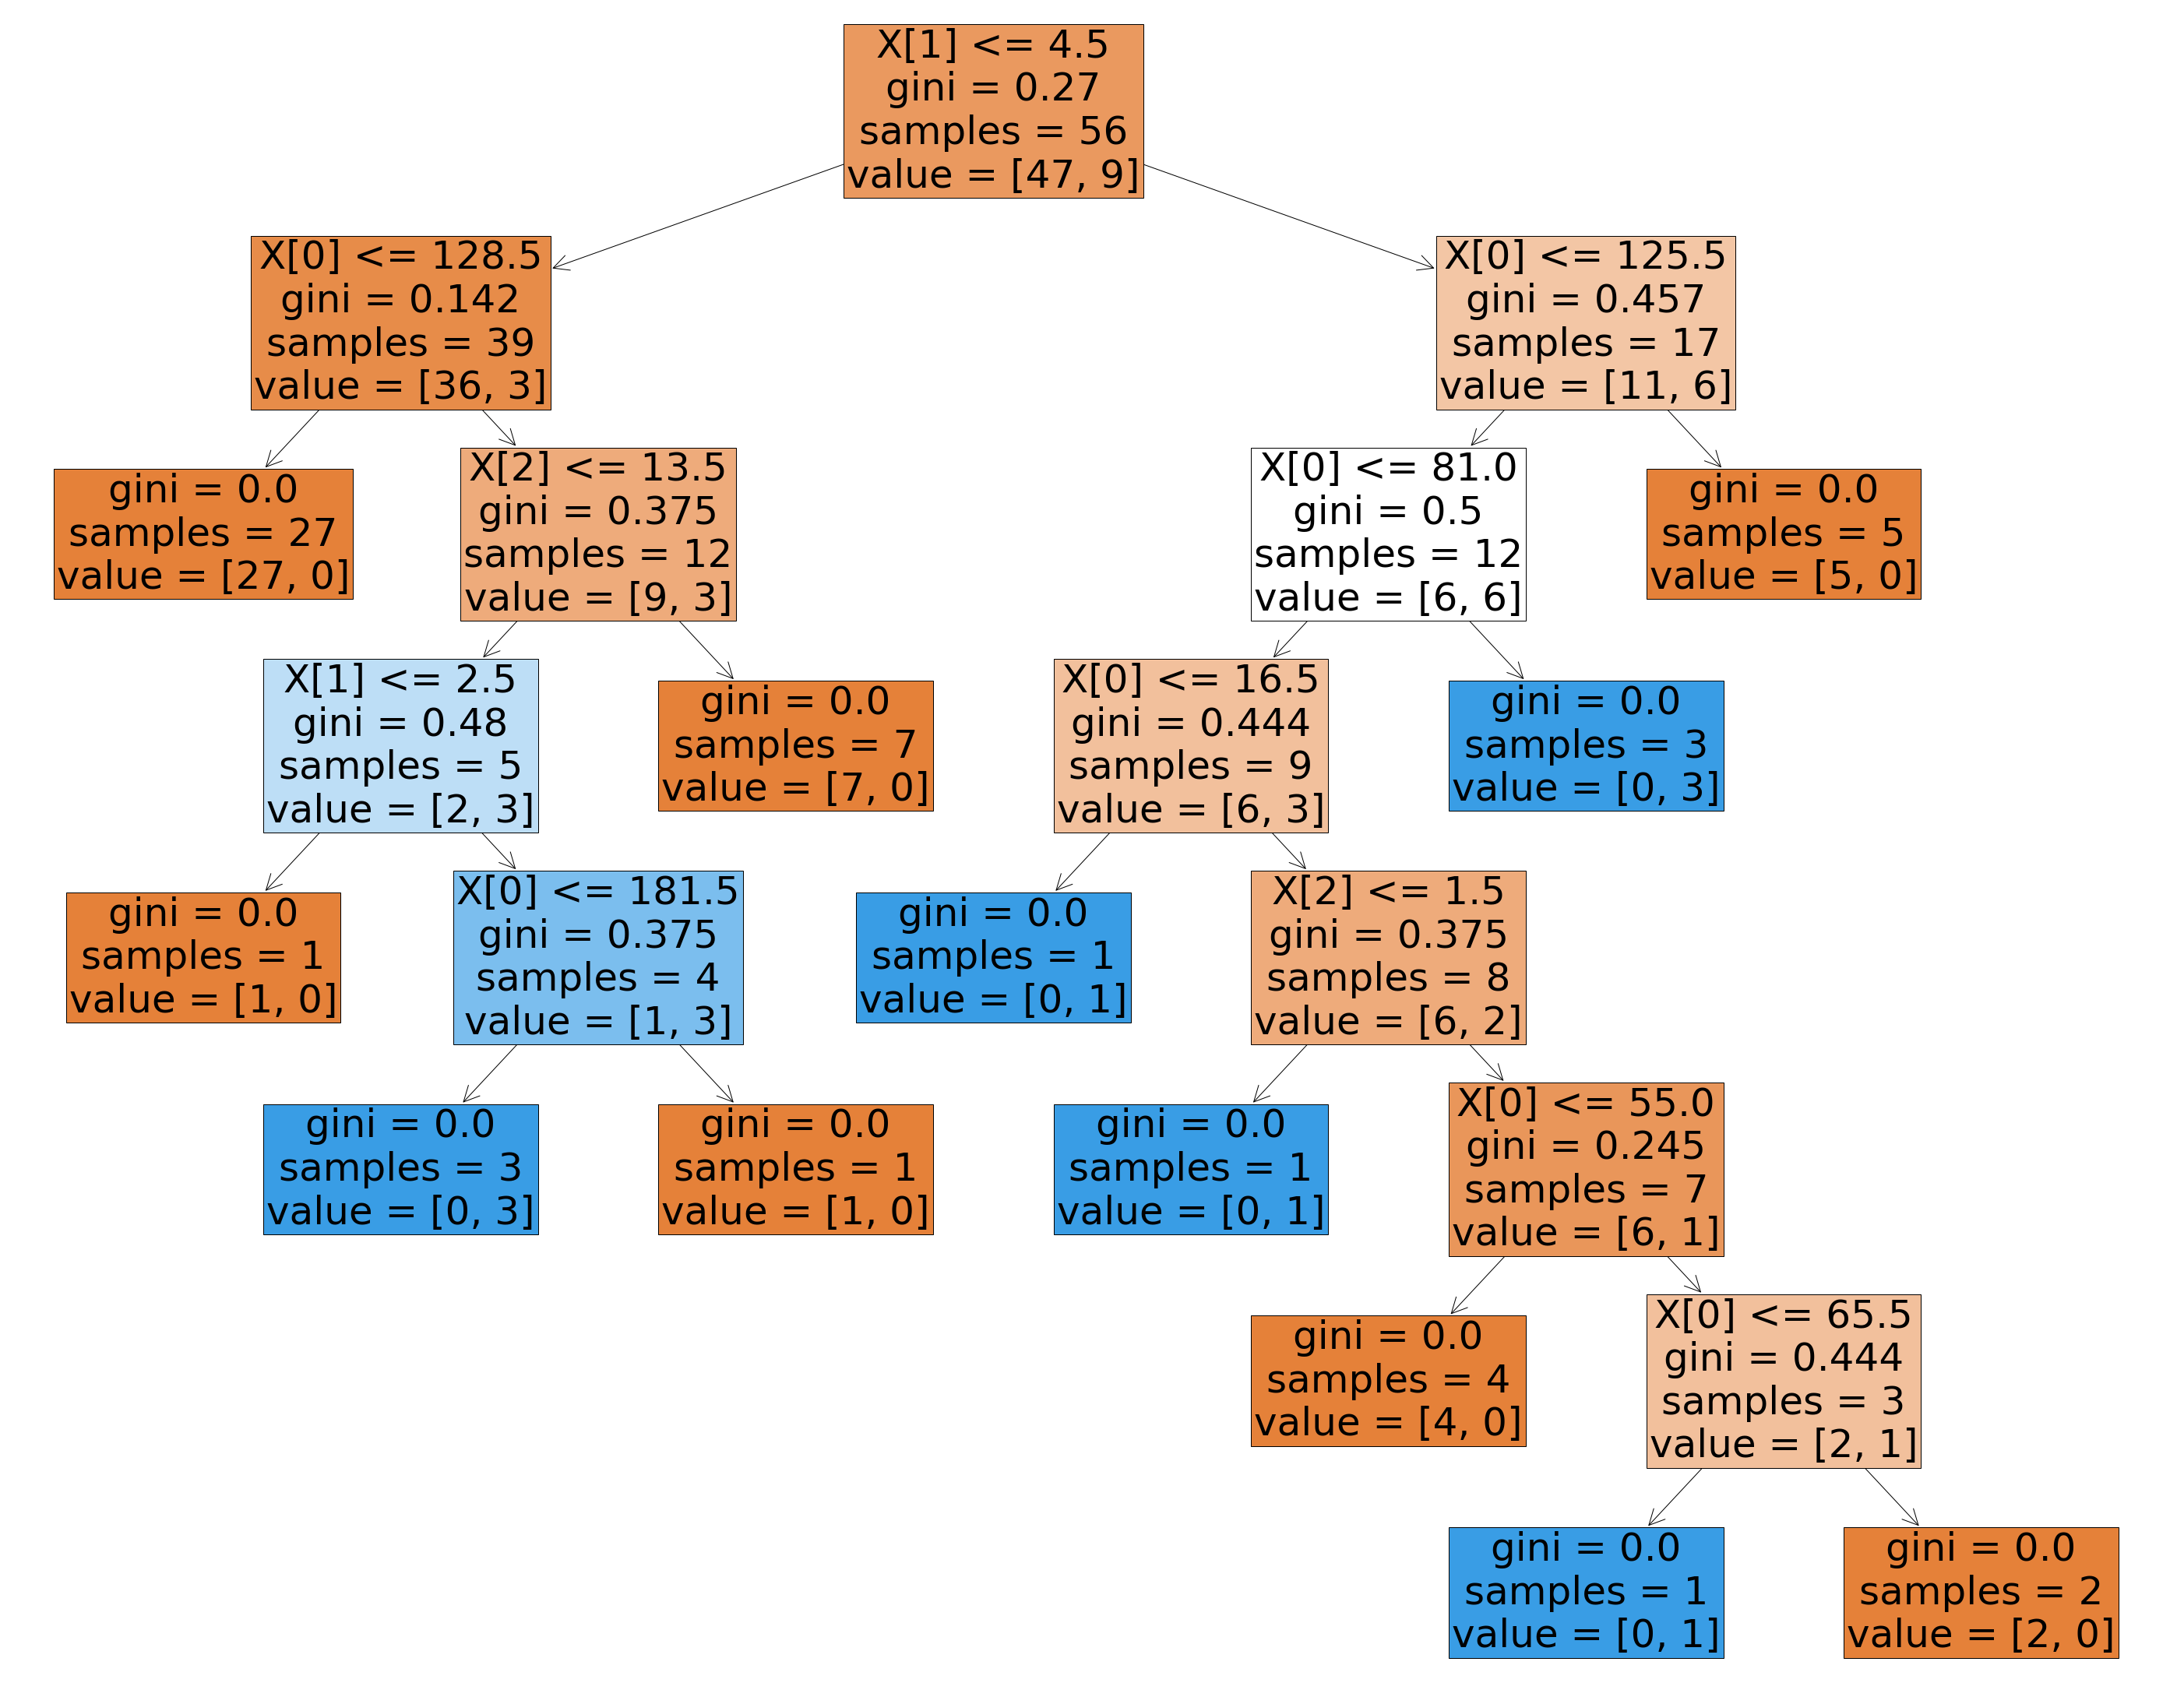

In [20]:
from sklearn import tree
plt.figure(figsize=(50,40))
tree.plot_tree(dtree,filled=True,fontsize=50)

''